# COM1011 – Fundamentals of Machine Learning (720054438)

# Part A – Exploratory data analysis and data visualisation

**Question 1** Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark].

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset1.csv')
print(df.head(5))

     Monastery  Latitude  Longitude          City  Country  \
0  Cistercians     47.13      15.28        Seckau  Austria   
1  Cistercians     48.05      16.13        Vienne  Austria   
2  Cistercians     48.61      15.20  Sanct Pölten  Austria   
3  Cistercians     48.20      14.74          Linz  Austria   
4  Cistercians     48.32      14.17          Linz  Austria   

  Administrative Region Historical Region  Starting  Ending  Monastery_index  
0            Steiermark  STYRIA (AUSTRIA)      1130    1958                0  
1     Niederoesterreich  STYRIA (AUSTRIA)      1135    2011                0  
2     Niederoesterreich  STYRIA (AUSTRIA)      1138    2011                0  
3       Oberoesterreich  STYRIA (AUSTRIA)      1142    1784                0  
4       Oberoesterreich  STYRIA (AUSTRIA)      1146    1945                0  


**Question 2** Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column.
Within the scatterplot function, set the colour map to ’rainbow’.
The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index. [1 mark]

ax1 = df.plot.scatter(x = 'Longitude', y = 'Latitude', c = 'Monastery_index', colormap = 'rainbow')

**Question 3** Plot a histogram for the monastery starting year of activity, represented in the Starting column. Add the title “Starting year” to the plot. [1 mark]

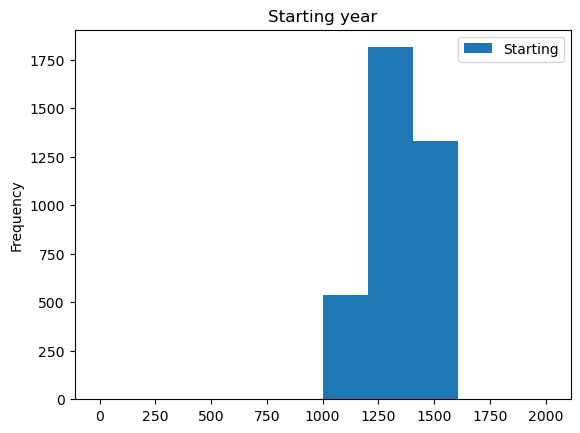

In [4]:
ax = df.plot.hist(column = 'Starting', title = 'Starting year')

**Question 4** Make a figure with two histograms, still using the Starting column:
a) One histogram representing the Cistercian monasteries, corresponding to rows in the
dataframe where the Monastery column is equal to 'Cistercians'.
b) And one histogram representing the Franciscan monasteries, corresponding to rows in the
dataframe where the Monastery column is equal to 'Franciscans'.
c) Add a legend indicating which histogram corresponds to which type of monastery.
d) Add the title “Starting year” to the figure.
[2 marks]

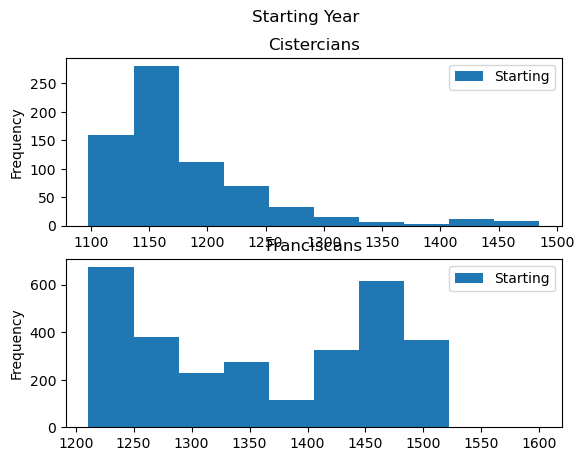

In [5]:
ax2 = df.plot.hist(column = 'Starting', by = 'Monastery', title = 'Starting Year')

**Question 5** Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot. [2 marks]

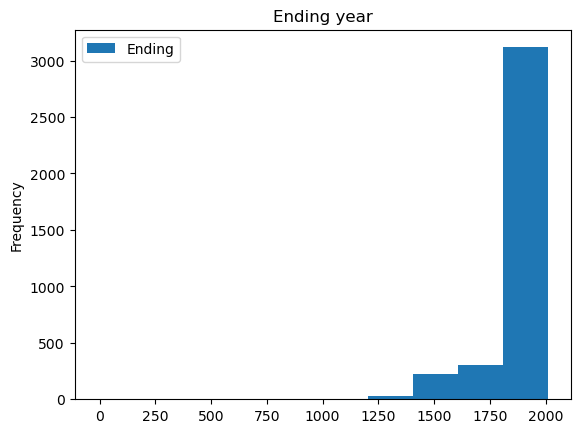

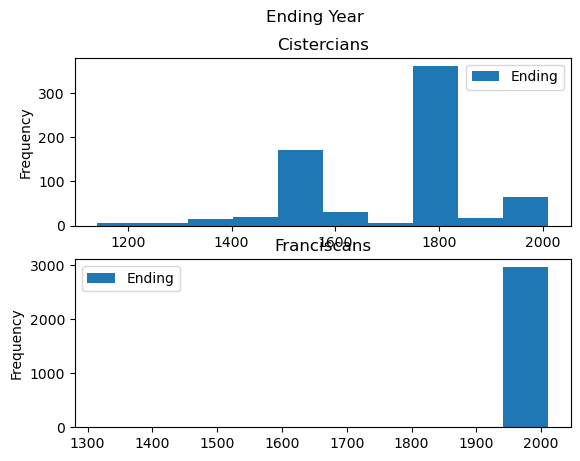

In [6]:
ax3 = df.plot.hist(column = 'Ending', title = 'Ending year')
ax4 = df.plot.hist(column = 'Ending', by = 'Monastery', title = 'Ending Year')

**Question 6** Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

In [7]:
appear = df.groupby(['Country']).size()
display(appear)

Country
Austria             48
Belgium             55
Czech Republic      63
France             724
Germany            276
Hungary             69
Ireland             90
Italy             1450
Italy                3
Netherlands         49
Poland             129
Portugal            58
Slovakia            21
Slovenia            16
Spain              418
Switzerland         28
UK                  98
United Kingdom      82
portugal             1
dtype: int64

<AxesSubplot:xlabel='Country'>

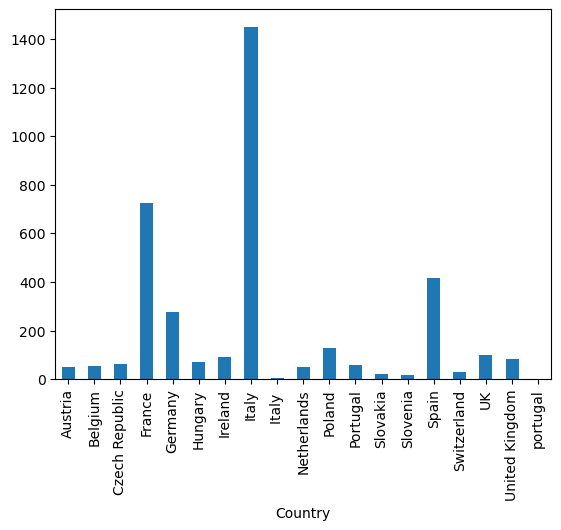

In [8]:
county_counts = df['Country'].value_counts()
appear.plot.bar(x = 'Country', y ='dtype')

# Part B - Training classifiers

**Question 7** Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [9]:
X = df[['Starting', 'Ending']]
y = df['Monastery_index']

**Question 8** Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Question 9a** Classification using a Perceptron:
a) Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

In [11]:
from sklearn.linear_model import Perceptron
perc = Perceptron(eta0=1.0)
perc.fit(X_train, y_train)
y_pred = perc.predict(X_test)

**Question 9b** b) Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print that fraction. [2 mark]

In [12]:
from sklearn.datasets import make_classification
frac = (y_test != y_pred).sum()
total = len(y_test)
fraction = frac/total
print("Fraction:", fraction)

Fraction: 0.17957166392092258


**Question 9c** c) Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

/Users/armannurlanbek/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8204283360790774

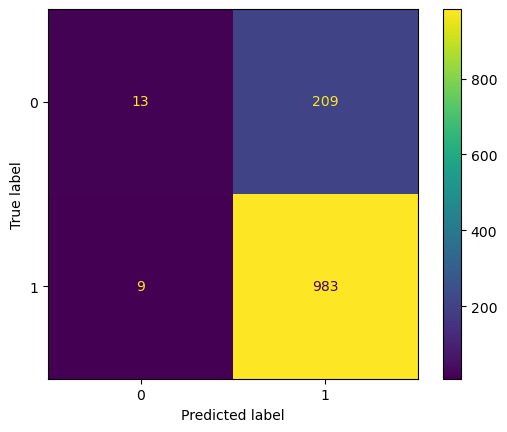

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(perc, X_test, y_test)
perc.score(X_test, y_test)

**Question 9d** d) Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision,
recall, accuracy and F1 score of the perceptron. [2 marks]

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))
print('Recall ' + str(recall_score(y_test, y_pred)))
print('Precision ' + str(precision_score(y_test, y_pred)))
print('F1 ' + str(f1_score(y_test, y_pred)))

Accuracy 0.8204283360790774
Recall 0.9909274193548387
Precision 0.8246644295302014
F1 0.9001831501831503


**Question 10** Classification using Logistic Regression: do the same as the question above, but using the logistic
regression classifier. [4 marks]

Fraction: 0.026359143327841845


/Users/armannurlanbek/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9736408566721582
Recall 0.9909274193548387
Precision 0.9771371769383698
F1 0.9839839839839839


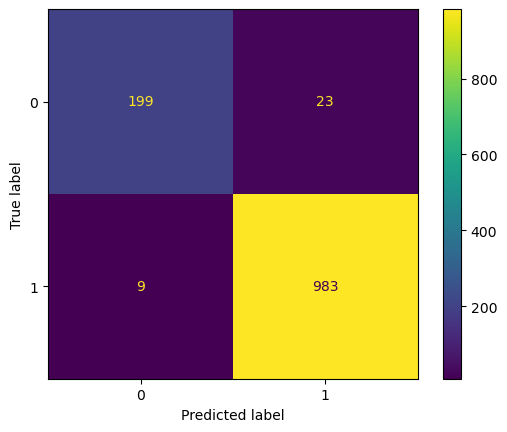

In [15]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
frac = (y_test != y_pred).sum()
total = len(y_test)
fraction = frac/total
print("Fraction:", fraction)
plot_confusion_matrix(logistic_regression, X_test, y_test)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))
print('Recall ' + str(recall_score(y_test, y_pred)))
print('Precision ' + str(precision_score(y_test, y_pred)))
print('F1 ' + str(f1_score(y_test, y_pred)))

**Question 11** Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks]

**Answer.** Logistic Regression classifier perfomed better than Perceptron classifier according to metrics and confusion matrix. Accuracy of Logistic Regression is higher than Perceptron's. Additionally, precision of Logistic Regression is higher than Perceptron's. F1 of Logistic regression is higher than Perceptron's.

Confusion matrix of Logistic Regression demostrates more True positives and True negatives which means that Logistic regression was better at prediction.

**Question 12** If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [4 marks]

**Answer.** Precision, recall, accuracy and F1 change after running the code again because the code is training model, therefore each time indicators (numbers) are changed during training. 

# Part C - Linear Regression

**Question 13** Read the file dataset2.csv into a dataframe. Display the first five rows of the dataset. [1 mark]

In [16]:
df2 = pd.read_csv('dataset2.csv')
print(df2.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

**Question 14** Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable quality on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include quality. [1 mark]

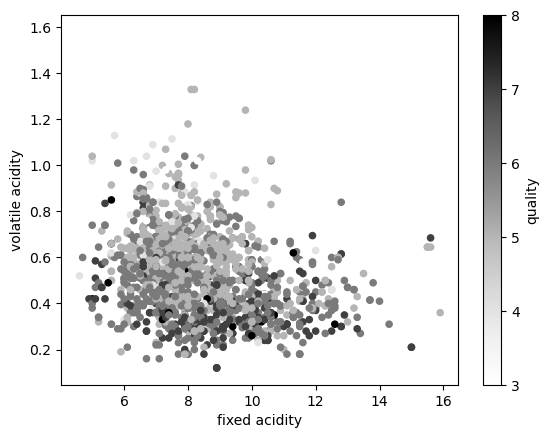

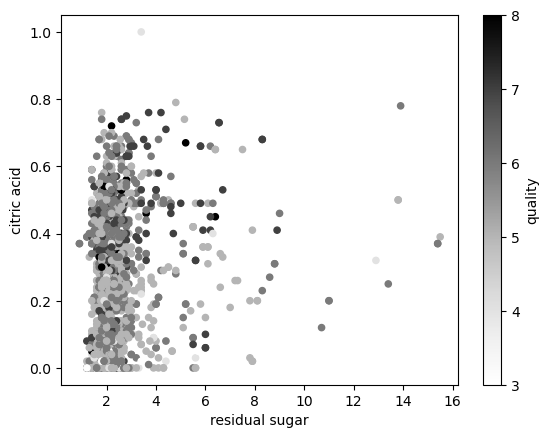

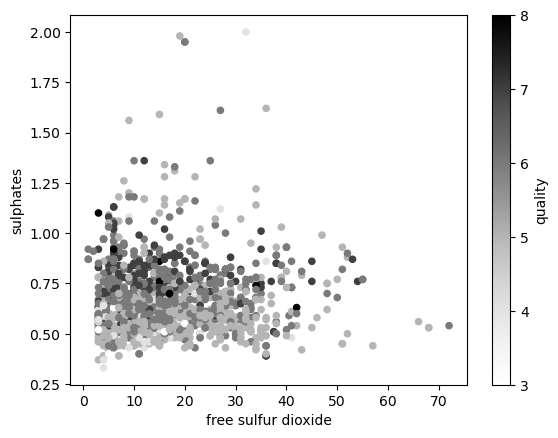

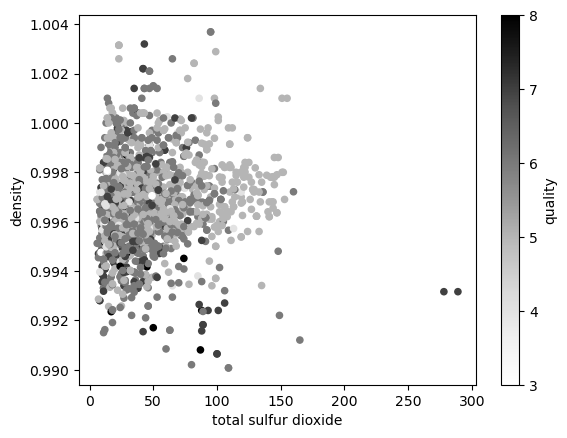

In [17]:
ax1 = df2.plot.scatter(x = 'fixed acidity', y = 'volatile acidity', c = 'quality')
ax2 = df2.plot.scatter(x = 'residual sugar', y = 'citric acid', c = 'quality')
ax3 = df2.plot.scatter(x = 'free sulfur dioxide', y = 'sulphates', c = 'quality')
ax4 = df2.plot.scatter(x = 'total sulfur dioxide', y = 'density', c = 'quality')

**Question 15** Print the Pearson correlation between the pairs of variables you have included in the scatterplots. For every pair of variables, print the names of the variables, and the corresponding correlation.
[1 mark]

In [18]:
x1, y1 = df2['fixed acidity'], df2['volatile acidity']
x2, y2 = df2['residual sugar'], df2['citric acid']
x3, y3 = df2['free sulfur dioxide'], df2['sulphates']
x4, y4 = df2['total sulfur dioxide'], df2['density']
print('fixed acidity', 'volatile acidity', np.corrcoef(x1,y1))
print('residual sugar','citric acid', np.corrcoef(x2,y2))
print('free sulfur dioxide','sulphates', np.corrcoef(x3,y3))
print('total sulfur dioxide','density', np.corrcoef(x4,y4))

fixed acidity volatile acidity [[ 1.         -0.25613089]
 [-0.25613089  1.        ]]
residual sugar citric acid [[1.         0.14357716]
 [0.14357716 1.        ]]
free sulfur dioxide sulphates [[1.         0.05165757]
 [0.05165757 1.        ]]
total sulfur dioxide density [[1.         0.07126948]
 [0.07126948 1.        ]]


**Question 16** Linear regression: [3 marks]
a) Choosing the input variable X corresponds to any three columns of the dataset, except for
quality, and the variable y corresponds to the quality column. 
b) Fit a linear regression between X and y.
c) Print out the R2 score of the linear regression.
d) Print out the linear regression model’s slope coefficients and intercept.

In [19]:
from sklearn.linear_model import LinearRegression
X = df2[['fixed acidity', 'citric acid', 'sulphates']]
y = df2['quality']
lin_reg = LinearRegression()
regression = lin_reg.fit(X,y)
print("R2 score is " + str(lin_reg.score(X,y)))
print('Slope coefficients are ' + str(lin_reg.coef_))
print('Intercept is ' + str(lin_reg.intercept_))

R2 score is 0.08832593191168692
Slope coefficients are [-0.01911352  0.79525137  0.94779403]
Intercept is 4.955756763102318


**Question 17** Of the three variables you picked to predict quality, is it possible to say which variable is the strongest predictor of the variable quality, according to your linear regression model? If not, is there any modification to the model that would make it possible to answer that question? Explain how you arrived at that conclusion. [5 marks]

**Answer.** The strongest predictor for the 'quality' variable is a variable with the highest R coefficient.

**Question 18** K-fold cross-validation [3 marks]
a) Using the same X and y variables defined in the question above, perform a K-fold cross-
validation of the linear regression model, with K = 5.
b) For each fold, calculate the R2 score.
c) Print the mean and standard deviation of the five R2 scores.

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cross_validation = KFold(n_splits=5, random_state=1, shuffle=True)
r2_scores = cross_val_score(lin_reg, X, y, scoring = 'r2', cv = cross_validation)
print('R2 scores: ' + str(r2_scores))
from numpy import mean
from numpy import absolute
print('Mean: ' + str(mean(absolute(r2_scores))))
print('SD: ' + str(np.std(r2_scores)))

R2 scores: [0.10004989 0.084816   0.0219372  0.06768047 0.12534494]
Mean: 0.07996569907549522
SD: 0.03465374315561746


**Question 19** If, rather than choosing three columns, you had used all columns to predict quality, would the average R2 score be necessarily higher? Why / why not? In which circumstances would it be higher or not? (Feel free to try it in your code! But please provide a justification for your answer) [4 marks]

**Answer.** R2 demonstrates how accurate model fits the data. High R2 mean it fits better. Therefore, it can be stated
if we include all columns the mean of R2 is higher, therefore the data fits model better. However if we remove
some columns R2 can be even higher, lower or almost the same.

Mean is higher when data in column fits the model.

In [21]:
X = df2[['fixed acidity', 'citric acid', 'sulphates', 'volatile acidity', 'residual sugar', 'free sulfur dioxide','total sulfur dioxide', 'density']]
cross_validation = KFold(n_splits=5, random_state=1, shuffle=True)
r2_scores = cross_val_score(lin_reg, X, y, scoring = 'r2', cv = cross_validation)
from numpy import mean
from numpy import absolute
print('Mean with all columns  ' + str(mean(absolute(r2_scores))))

Mean with all columns  0.276784208603439


In [22]:
X = df2[['fixed acidity', 'citric acid', 'sulphates', 'volatile acidity', 'residual sugar','total sulfur dioxide', 'density']]
cross_validation = KFold(n_splits=5, random_state=1, shuffle=True)
r2_scores = cross_val_score(lin_reg, X, y, scoring = 'r2', cv = cross_validation)
from numpy import mean
from numpy import absolute
print('Mean with some columns  ' + str(mean(absolute(r2_scores))))

Mean with some columns  0.2748590436203659


**Question 20** Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [5 marks]

**Answer.** Model with lower R2 can be chosen because model with very high R2 can be bias and underpredict or overpredict. 
Also a model with lower R2 has higher mobility. For example models that investigate human behavior mostly have R2 <50%. 
A model with lower R2 may have very significant variables therefore more useful than not so important variables in 
a model with higher R2. 

Classifiers with higher accuracy are better at predicting however it counts all true predicted values and does not
predict specific values which can be important.

# Part D – Clustering

**Question 21** Using the pandas library, read the file dataset3.csv into a dataframe. Print or display the first
five rows of the dataset. [1 mark]

In [23]:
df3 = pd.read_csv('dataset3.csv')
print(df3.head(5))

   Tree_ID                               Address          Town Tree_Species  \
0    27092             Clonard Court, Balbriggan    Balbriggan         ACSA   
1    29144       Ridgewood Avenue, Forrest Great  Swords South         TICO   
2    29160       Ridgewood Avenue, Forrest Great  Swords South         TICO   
3    29400       Ridgewood Avenue, Forrest Great  Swords South         TICO   
4   246560  Lanesborough Grove, Saint Margaret's        Santry         TICO   

       Species_Desc        Common_Name     Age_Desc          Height  \
0  Acer saccharinum       Silver Maple  Semi-Mature   5.1-10 metres   
1     Tilia cordata  Small-Leafed Lime        Young  Up to 5 metres   
2     Tilia cordata  Small-Leafed Lime        Young  Up to 5 metres   
3     Tilia cordata  Small-Leafed Lime        Young  Up to 5 metres   
4     Tilia cordata  Small-Leafed Lime        Young  Up to 5 metres   

           Spread         Trunk Actual_Trunk     Condition   Latitude  \
0   3 to 6 metres  11cm t

**Question 22** K-means clustering:
a) Define a variable X corresponding to the Longitude and Latitude columns of the
dataset.
b) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times,
using k = 5, 10, 15.
c) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

K =  5 Silhouette score:  0.5960041191450073
K =  5 Davies Bouldin score:  0.5859005430336415
K =  10 Silhouette score:  0.6088276130800068
K =  10 Davies Bouldin score:  0.5078101713614958
K =  15 Silhouette score:  0.6389541267971689
K =  15 Davies Bouldin score:  0.4594726559436338


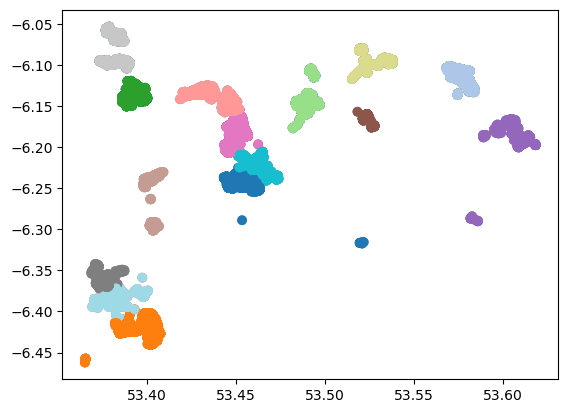

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
X = df3[['Longitude', 'Latitude']]
scaler = StandardScaler()
df3[['Longitude_1', 'Latitude_1']] = scaler.fit_transform(X)

k_values = [5,10,15]
for i in k_values:
    k = i
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df3[['Longitude_1', 'Latitude_1']])
    plt.scatter(x = df3['Latitude'], y = df3['Longitude'], c = kmeans.labels_, cmap = 'tab20')
    y_predict = kmeans.fit_predict(X)
    silh_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    print('K = ', i, "Silhouette score: ", silh_score)
    dav_score = davies_bouldin_score(X, kmeans.labels_)
    print('K = ', i, "Davies Bouldin score: ", dav_score)

**Question 23** DBSCAN clustering:
a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the
trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.
b) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

Eps:  0.001 Silhouette Score:  0.2262027163739034
Eps:  0.001 Davies Bouldin score:  1.010144151732693
Eps:  0.005 Silhouette Score:  0.5407076619494855
Eps:  0.005 Davies Bouldin score:  0.8701655710038124
Eps:  0.01 Silhouette Score:  0.393094609216659
Eps:  0.01 Davies Bouldin score:  0.5967046437435546
Eps:  0.05 Silhouette Score:  0.4388338080434463
Eps:  0.05 Davies Bouldin score:  0.4451886348997588


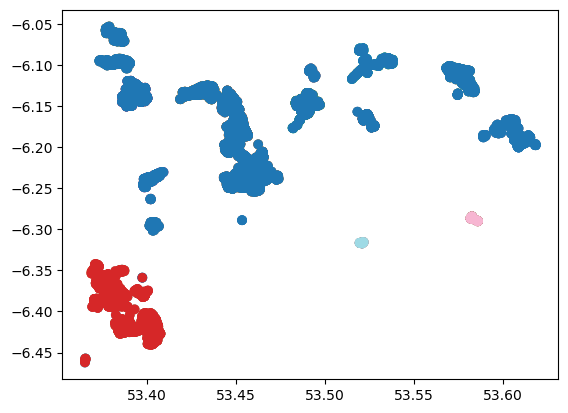

In [25]:
from sklearn.cluster import DBSCAN
eps_values = [0.001, 0.005, 0.01, 0.05]
X = df3[['Longitude', 'Latitude']]
for i in eps_values:
    clustering = DBSCAN(eps=i, min_samples = 4).fit(X)
    plt.scatter(x = df3['Latitude'], y = df3['Longitude'], c = clustering.labels_, cmap = 'tab20')
    silh_score = silhouette_score(X, clustering.labels_, metric='euclidean')
    print("Eps: ", i, "Silhouette Score: ", silh_score)
    dav_score = davies_bouldin_score(X, clustering.labels_)
    print('Eps: ', i, "Davies Bouldin score: ", dav_score)

**Question 24** Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering, according to the Silhouette score? [2 marks]

**Answer.** According to silhouette score, a clustering produced the best clustering is KMeans clustering with k = 15.

**Question 25** Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

**Answer.** According to Davies Bouldin score, a clustering produced the best clustering is DBSCAN clustering with Eps = 0.05.

**Question 26** Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

**Answer.** Unfortunately, according to Silhouette score and Davies Boulding score, hierarchical clustering has not given better results.

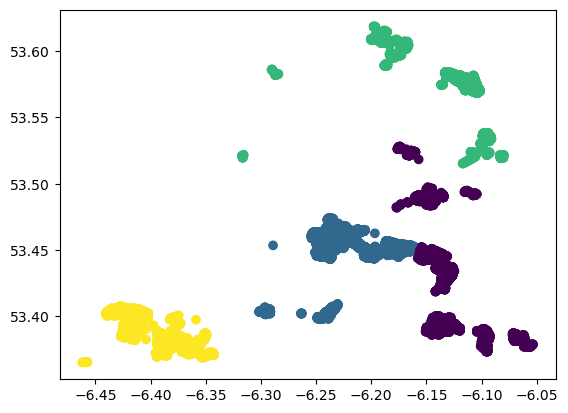

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(X)

plt.scatter(df3['Longitude'], df3['Latitude'], c=labels)
plt.show()

In [28]:
silh_score = silhouette_score(X, hierarchical_cluster.labels_, metric='euclidean')
print('Silhouette score: ', silh_score)
dav_score = davies_bouldin_score(X, hierarchical_cluster.labels_)
print('Davies Bouldin score: ', dav_score)

Silhouette score:  0.5938352638722617
Davies Bouldin score:  0.5850238720138284


**Question 27** Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

**Answer.** DBSCAN is highly sensetive to its parameters: minimum number points, epsilon. Considering time consumption of DBSCAN, large value of eps can give comprehensive clusters. However because eps is a maximal distance that can be
between two points, a large value of eps therefore may take longer time for clustering. 
Additionally, K-means clustering is capable in effectively dealing with large datasets, while DBSCAN hardly deals with 
high deminsional datasets.

**Question 28** Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]
 

**Answer.**                         DBSCAN
Let consider case where we deal with set of integer numbers such that: set = [1,4,7,9, 2009]. 
Clearly, element '2009' is outlier. K-means clustering algorithm has difficulties at dealing with outliers because 
it uses mean of cluster data points to find cluster center. Therefore, it would be better to use DBSCAN as it deals
better with noise and outliers and can make clusters of arbitary shape. Additional case could be the fact that DBSCAN
does not require number of clusters while K-means clustering algorithm requires 'k' value which is number of clusters.
                                   K-means
If there is a case a data is high dimensional, it would be better to use KMeans because DBSCAN poorly deals with this
kind of data. DBSCAN's eucludian concept usually does not operate well on high dimensional data.

# PART E - Model Selection

**Question 29** Consider the figure above and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

**Answer.** 
Model A: It can be seen both error for the Testing set and error for the Training set having high and low error at the beggining respectively, they eventually flatten and seek together which means adding more examples to the 
training set will not make significant changes to the training set.

Model B: Long distance between error for the Testing set and error for the Training set indicates that it is an
overfit model. Consequently, adding more examples to the trainig set can improve the model. Also, errors may come 
closer to each other by adding more examples.

**Question 30** Consider the figure above and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

**Answer.** 
Clearly, the main differences between the models A, B and C are: Model A has high error for the both Training and 
Testing sets, model B has low error for both Testing and Training sets, model C has high error for the Testing set 
and low error for the Training set.

Bias-variance trade-off is a right proportion between bias and variance values which eventually leads to a good model.
Nevertheless, there can be an assuption that model A has a high bias value because both Training and Testing sets 
have high error. Model B represents Bias-variance trade-off, therefore it has low error on both sets.
High variance model pays a lot of attention to a traing set which leads to low error for traing set and high error
for testing set which can be seen in model C.


**Question 31** The quality of a classifier can be measured in many ways. Describe three metrics or tools used to measure how good a classifier is, and explain why it might be better to use the three of them, rather than just a single metric. [5 marks]


**Answer.** 

Accuracy metric's purpose is to measure to what extent classifier correctly predicts. Accuracy can be found by 
division of number of correct predictions by number of total predictions. However Accuracy does not completely 
assures that prediction is accurate even though there could be accuracy equal to 99%. Its credibility depends on 
data given. For instance, there is a binary classification that detects either an email is spam or not. If the data content
99 spam emails and 1 not spam email, the accuracy will be 99% because classification would always bump into spam emails.
Therefore, there might be a case when accuracy by itself is not enough.

Classification matrix is a table with predicted and actual values. It demonstrates perfomance of classification model
on set of test data with known true values. Values on the table: True Positive(TP), True Negative(TN), False Positive(FP) and
False negative(FN). 
Classification matrix is a tool that is used to calculate metrics such as Accuracy, Recall, Precision and AUC-ROC curves.

Precision is a metric that illustrates how many true predictions are positive. The metric is useful when False positive
could lead to bigger mistakes than False negatives. 
It is calculated by dividing correctly predicted positive examples by the total number of positive examples. 




**Question 32** Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]


**Answer.** 

Formulas of Precision and Recall:

Precision = True Positives / True Positives + False Positives
Recall = True Positives / True Positives + False Negatives

For example, there is a dataset of not spam 10 and 12 spam emails. 8 elements were identified as spam emails, however
only 5 of them are actually spam (True Positives). Therefore, there are 3 not spam emails (False Positives). 
7 spam emails were not detected (False Negatives) and 7 not spam emails were not detected either (True Negatives).

Thus, Precision = 5/8  
      Recall = 5/12 

The formulas and the example illustrates that it is impossible to make 100% precision and 100% recall simaltaneously when number of False Positives does not equal to number of False Negatives, precision and recall cannot be the same.







**Question 33** In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

**Answer.** 

Choosing between high recall or high precision depends on case data scientist has. For example, there is a business that needs to promote its product so they started advertisment. The business's main priority is to have high
precision than high recall because they want to avoid customers that do not want to buy their product(False Positives)

However, if there is a case of detecting a disease than for the data scientist is more important to have high precision than high recall because its goal is to avoid patients that have disease but were not detected(False Negatives)






**Question 34** Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]


**Answer.** 

Facial Recognition Algorithm is an example of algorithm with high accuracy in one context but low accuracy in another. A different environment is what causes it. For intance, there is a dataset of profile pictures of people for passport that the algorithm was originally trained on. It eventually trained very well and demostrates high accuracy on dataset of the similar pictures for passport. However applying this algorithm on CCTV cameras would not show the same high accuracy because traits that the algorithm was trained on are not the same. Also, considering environment of CCTV cameras, for algorithm it is more unpredictable than well-structured and coherent. To diagnose and address such problem, algorithm needs to be trained on new set of test data or it needs to be orininally trained on wider range of data.


**Question 35** Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

**Answer.** 

Algorithm that predict stock prices is an example of algorithm with low training and testing datasets. This algorithm can rely on economic and political stability of the companies' countries, companies' revenue and amount of sold and bought stocks however the fundamental flaw of this algorithm that in the real world scenario such metrics do not garantue correct prediction. Real world scenario has unpredictable outcomes, therefore algorithm can be too optimistic and would not calculate market risks. To address such problem, use of more varied training dataset to train algorithm is needed.

